# Task 7.1
# Akhilkumar K S
# ID: SIRSS2138

## Q1. Implement gradient descent (for simple linear regression) from scratch.

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data

data=pd.read_csv('Salary_Data.csv')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.shape

(30, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
data.isnull().sum() # sa data has no null values

YearsExperience    0
Salary             0
dtype: int64

In [8]:
data.duplicated().sum()

0

Text(0, 0.5, 'Weight')

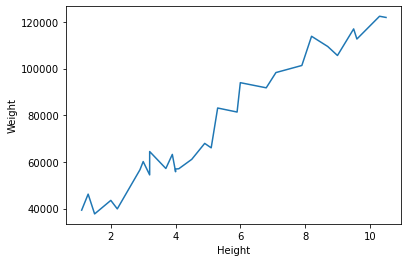

In [9]:
#Data dependent and independent variables relationship

plt.plot(data.iloc[:,0],data.iloc[:,1])
plt.xlabel('Height')
plt.ylabel('Weight')

In [10]:
#Splitting data into train , test data using sklearn library

X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [11]:
y_train

array([101302.,  56642.,  66029.,  64445.,  61111., 113812.,  91738.,
        46205., 121872.,  60150.,  39891.,  81363.,  93940.,  57189.,
        54445., 105582.,  43525.,  39343.,  98273.,  67938.,  56957.])

In [12]:
#Creating class for gradient descent process

class Gradient_Descent():
    def __init__(self):
        #initializing values
        self.learning_rate=0.01
        self.iterations=1000
        self.intercept=0
        
        
    def fit(self,X,Y):
        #fitting the data into model using gradient descent process
        self.X=X
        self.Y=Y
        
        self.m,self.n = X.shape
        
        self.coeff=np.zeros(self.n)
        
        for i in range(self.iterations):
            self.optimize()
            
        return print("Gradient Descent")
        
    def optimize(self):
        y_pred=self.predict(self.X)
        
        #finding coeff and intercept gradients 
        
        dm = (-2/self.m)*np.dot(self.X.T,self.Y - y_pred)
        
        db = (-2/self.m)*np.sum(self.Y - y_pred)
        
        #updating the values of coeff and intercept using gradient
        self.coeff = self.coeff - self.learning_rate*dm
        
        self.intercept = self.intercept - self.learning_rate*db
        
        return self
        
    
    def predict(self,x):
        #printing the predictions using the final slope and intercept (y=m*x + c)
        return np.dot(x,self.coeff) + self.intercept

In [13]:
#creating a model and feeding data into model
model=Gradient_Descent()
model.fit(x_train,y_train)

Gradient Descent


In [14]:
#Orginal values

print(y_test)

[ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.]


In [15]:
#predicted values

y_pred=model.predict(x_test)
print(y_pred)

[ 40542.36630334 123430.45347151  65032.02842121  63148.2082583
 115895.17281986 108359.89216821 116837.08290132  64090.11833975
  76334.94939869]


In [16]:
#we got a pretty good accuracy

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.9745593510247608

In [17]:
#Final coefficient and intercept values are

print('Coefficeint : {}\nIntercept : {}'.format(model.coeff[0],model.intercept))

Coefficeint : 9419.100814565125
Intercept : 26413.71508149363


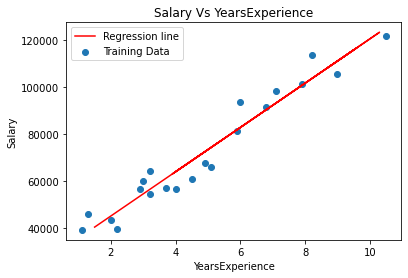

In [18]:
plt.scatter(x_train,y_train,label='Training Data')
plt.plot(x_test,y_pred,color="red",label='Regression line')
plt.xlabel('YearsExperience')
plt.ylabel("Salary")
plt.title('Salary Vs YearsExperience')
plt.legend()

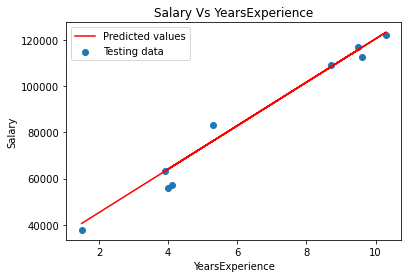

In [19]:
plt.scatter(x_test,y_test,label='Testing data')
plt.plot(x_test,y_pred,label='Predicted values',color='red')
plt.xlabel('YearsExperience')
plt.ylabel("Salary")
plt.title('Salary Vs YearsExperience')
plt.legend()

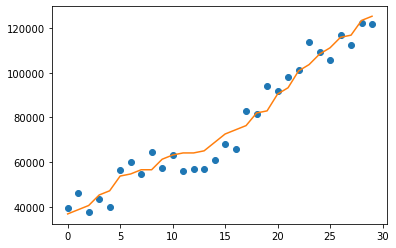

In [20]:
# predicted values in whole data

plt.plot(Y,'o')
plt.plot(model.predict(X))